In [1]:
#%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import plot
import calculate

#this defines the criterion which we use to filter authors
CAREER_LENGTH = 1
# this defines how long we follow each cohort
MAX_CAREER_LENGTH_COHORT = 15
END_YEAR = 2015

# what is this good for??? Not used at the moment
# maybe that was for grouping cohorts differently?
num_years_in_cohort = 1

import warnings
warnings.filterwarnings('ignore')

### Read authors with start and end year details

In [2]:
# authorStartEndCareerData = pd.read_csv('./derived-data/authors-scientific-atleast-'+str(CAREER_LENGTH)+'-year-extended.csv')
authorStartEndCareerData = pd.read_csv('./derived-data/authors-scientific-extended.csv')

In [3]:
print("authorStartEndCareerData: ", authorStartEndCareerData.shape[0])
# print(authorStartEndCareerData.head())

#print(authorStartEndCareerData[authorStartEndCareerData['author'] == 'donatella sciuto'])
authorStartEndCareerData.rename(columns={'num_pub':'total_num_pub'}, inplace=True)

authorStartEndCareerData:  1688735


#### Career Len removal

In [4]:
#print(authorStartEndCareerData.shape)
authorStartEndCareerData = authorStartEndCareerData[authorStartEndCareerData.career_length >= CAREER_LENGTH]
#print(authorStartEndCareerData.shape)


#this is probably not needed but should not harm since we only want to analyze people that started between 1971-2000
years = sorted(authorStartEndCareerData.start_year.unique())
COHORT_START_YEARS = [y for y in years if (y <= (END_YEAR - MAX_CAREER_LENGTH_COHORT)) and (y>=1971)]

authorStartEndCareerData = authorStartEndCareerData[authorStartEndCareerData.start_year.isin(COHORT_START_YEARS)]
#print(authorStartEndCareerData.shape)
#print(COHORT_START_YEARS)

In [5]:
authorStartEndCareerData.head()

,author,start_year,end_year,total_num_pub,career_length,max_absence-0-15,avg_absence-0-15,dropped_after_10,gender,ec_first_auth_3,...,early_career_prod_7,early_career_prod_9,early_career_prod_11,early_career_prod_12,early_career_coauthor_max_hindex_3,early_career_coauthor_max_hindex_5,early_career_coauthor_max_hindex_7,early_career_coauthor_max_hindex_9,early_career_coauthor_max_hindex_11,early_career_coauthor_max_hindex_12
3,a aart blokhuis,1992,2005,2,14,13,5.0000,True,none,0.0,...,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0
9,a min tjoa,1979,2017,191,39,7,0.9375,False,none,1.0,...,2,2,3,5,0.0,0.0,0.0,0.0,0.0,0.0
11,a stewart,1995,1995,1,1,15,7.5000,True,none,0.0,...,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0
16,a-chuan hsueh,1986,1988,2,3,13,5.0000,True,f,0.0,...,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0
18,a-imam al-sammak,1992,2006,3,15,13,3.7500,True,m,1.0,...,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0


### Read Publication data

In [6]:
authorPublicationData = pd.read_csv('derived-data/author-publications.csv')
author_year_numPub = authorPublicationData.groupby(['author', 'year'])['pub_id'].count().reset_index()
author_year_numPub = author_year_numPub.rename(columns={'pub_id':'num_pub'})

print("authorPublicationData: ", authorPublicationData.shape[0])

authorPublicationData.head()

authorPublicationData:  9317809


,author,year,pub_id
0,graeme earl,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821
1,gareth beale,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821
2,m. nasser,2009,001c8744-73c4-4b04-9364-22d31a10dbf1
3,faisal zaman,2009,001c8744-73c4-4b04-9364-22d31a10dbf1
4,altaf hossain,2009,001c8744-73c4-4b04-9364-22d31a10dbf1


In [7]:
author_year_numPub.head()

,author,year,num_pub
0,'maseka lesaoana,2001,1
1,'maseka lesaoana,2015,1
2,(max) zong-ming cheng,2009,1
3,(max) zong-ming cheng,2011,1
4,(zhou) bryan bai,2011,1


In [8]:
authorPublicationData[authorPublicationData["author"] == "'maseka lesaoana"]

,author,year,pub_id
4550515,'maseka lesaoana,2015,2a10f544-51ac-4261-8a26-cf61c1abdc03
4903647,'maseka lesaoana,2001,4ff8ca7b-16b7-4bc8-b235-1eeac9b2aefa


## Publications analysis

In [9]:
author_year_numPub_sample = author_year_numPub#.head(10000)

In [10]:
author_year_numPub_with_authors = author_year_numPub_sample.merge(authorStartEndCareerData[['author','start_year', 'gender']], on="author")

groupByYearData = calculate.calculate_cumulative_for_authors(author_year_numPub_with_authors, 'num_pub')

In [11]:
# years = groupByYearData['year'].unique()
# years = sorted(years)

cohort_start_years = COHORT_START_YEARS



In [12]:
# step = 3
# cohort_start_years = list(range(years[0], END_YEAR - MAX_CAREER_LENGTH_COHORT + step, step))
# skip_overlaping_years = False

In [13]:
print(groupByYearData[groupByYearData['author'] == '\'maseka lesaoana'].head(10))
#print(groupByYearData[groupByYearData['author'] == 'donatella sciuto'].head(10))
print(groupByYearData[groupByYearData['author'] == '(max) zong-ming cheng'].head(10))

Empty DataFrame
Columns: [year, author, num_pub, start_year, gender, cum_num_pub]
Index: []
Empty DataFrame
Columns: [year, author, num_pub, start_year, gender, cum_num_pub]
Index: []


#### Tests

In [14]:
# from importlib import reload
# reload(plot)
# reload(calculate)

In [15]:
# cohort_careerage_df = plot.get_cohort_careerage_df(groupByYearData, cohort_start_years, MAX_CAREER_LENGTH_COHORT, "num_pub", authorStartEndCareerData)

# #------------------------------------------
# # some plausibility checks
# print(cohort_careerage_df.head(n=1))
# subset1 = cohort_careerage_df[(cohort_careerage_df.cohort_start_year == 1991) & (cohort_careerage_df.career_age == 1) & 
#                               (cohort_careerage_df.gender == "all")]
# vals1 = subset1["values"]

# subset10 = cohort_careerage_df[(cohort_careerage_df.cohort_start_year == 1991) & (cohort_careerage_df.career_age == 10) & 
#                                (cohort_careerage_df.gender == "all")]
# vals10 = subset10["values"]

# from collections import Counter

# print(type(vals1))
# print(Counter(vals1.values[0]))
# print(len(vals1.values[0]))


# print(type(vals10))
# print(Counter(vals10.values[0]))
# print(len(vals10.values[0]))


In [16]:
# groupByYearData[groupByYearData['year'] == 2018].shape

In [17]:
# groupByYearData[groupByYearData['year'] == 2018]['num_pub'].sum()

In [18]:
# from plot import *

# max_career_age_cohort, criterion, criterion_display = MAX_CAREER_LENGTH_COHORT, "num_pub", "Publications"

# print("get_cohort_careerage_df")
# cohort_careerage_df = get_cohort_careerage_df(groupByYearData, cohort_start_years, max_career_age_cohort, criterion, authorStartEndCareerData)

# print("group_cohorts")
# cohort_careerage_df = group_cohorts(cohort_careerage_df, cohort_start_years, num_years_in_cohort)

# #gini
# cohort_size_gini = get_cohort_size_gini(cohort_careerage_df,criterion, cohort_careerage_df["cohort_start_year"].unique())

# print("plot_gini")
# plot_gini(cohort_size_gini, criterion, criterion_display)

# print("plot_cohort_size_gini_cor")
# plot_cohort_size_gini_cor(cohort_size_gini,  criterion, criterion_display)

# # effect size and significance - mwu
# cohort_effect_size_df = get_cohort_effect_size(cohort_careerage_df)

# # mean/std/median
# stats = get_cohort_stats(cohort_careerage_df, criterion)
# stats = stats.merge(cohort_effect_size_df, on=['cohort_start_year', 'career_age'])
# # doesnt plot anything
# #     plot_cohort_gender_diffs(stats, criterion, criterion_display)
# print("plot_cohort_means_over_ages")
# plot_cohort_means_over_ages(stats, criterion, criterion_display)

# stats[['cohort_start_year', 'cohort_size', 'career_age', 'cliffd_m_f', 'values', 'effect', 'statistic', 'pvalue']].head()

# plot_cohort_diffs_over_ages(stats, criterion, criterion_display)

## Run cohort analysis

In [19]:
#plot.run_cohort_analysis(groupByYearData, cohort_start_years, MAX_CAREER_LENGTH_COHORT, "num_pub", "Publications", authorStartEndCareerData, num_years_in_cohort)  

In [20]:
groupByYearData.head()

,year,author,num_pub,start_year,gender,cum_num_pub
0,1971,r. b. hollstien,1,1971,m,1
1,1971,l. gilli,1,1971,m,1
2,1971,zhiyuan li,1,1971,none,1
3,1971,murray turoff,1,1971,m,1
4,1971,zhiyu shen,1,1971,none,1


get_cohort_careerage_df
start_year: 1971
cohort_size: 981
start_year: 1972
cohort_size: 1207
start_year: 1973
cohort_size: 1400
start_year: 1974
cohort_size: 1830
start_year: 1975
cohort_size: 1599
start_year: 1976
cohort_size: 1996
start_year: 1977
cohort_size: 1929
start_year: 1978
cohort_size: 1907
start_year: 1979
cohort_size: 2352
start_year: 1980
cohort_size: 2458
start_year: 1981
cohort_size: 2817
start_year: 1982
cohort_size: 3262
start_year: 1983
cohort_size: 3721
start_year: 1984
cohort_size: 4668
start_year: 1985
cohort_size: 4821
start_year: 1986
cohort_size: 5857
start_year: 1987
cohort_size: 6624
start_year: 1988
cohort_size: 8364
start_year: 1989
cohort_size: 9293
start_year: 1990
cohort_size: 10871
start_year: 1991
cohort_size: 12429
start_year: 1992
cohort_size: 13769
start_year: 1993
cohort_size: 16375
start_year: 1994
cohort_size: 18390
start_year: 1995
cohort_size: 19201
start_year: 1996
cohort_size: 20803
start_year: 1997
cohort_size: 23234
start_year: 1998
cohort_

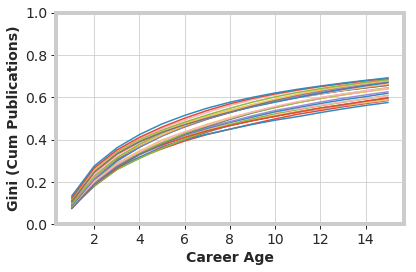

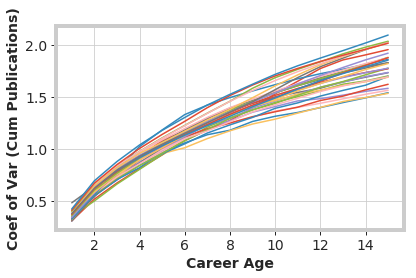

unique_career_ages:
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
plot_cohort_size_gini_cor fig
plot_cohort_size_gini_cor fig2
plot_cohort_means_over_ages


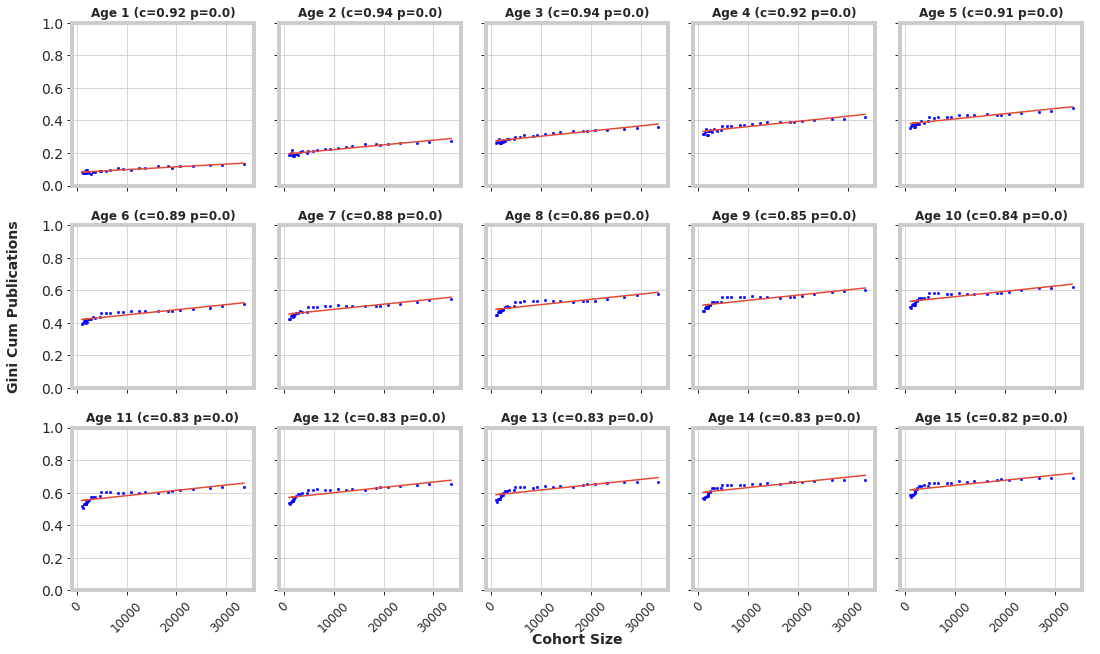

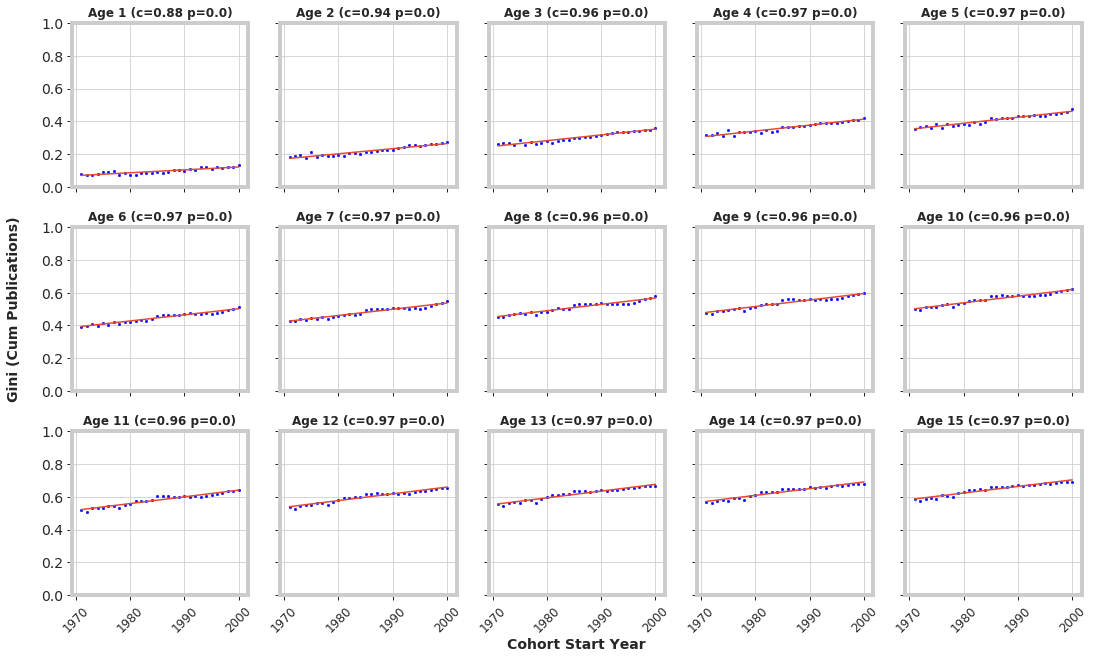

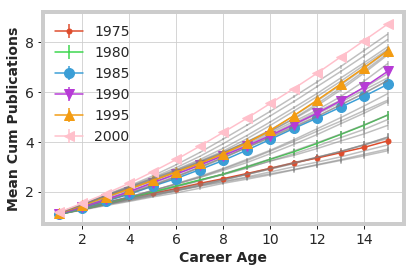

plot_cohort_diffs_over_ages


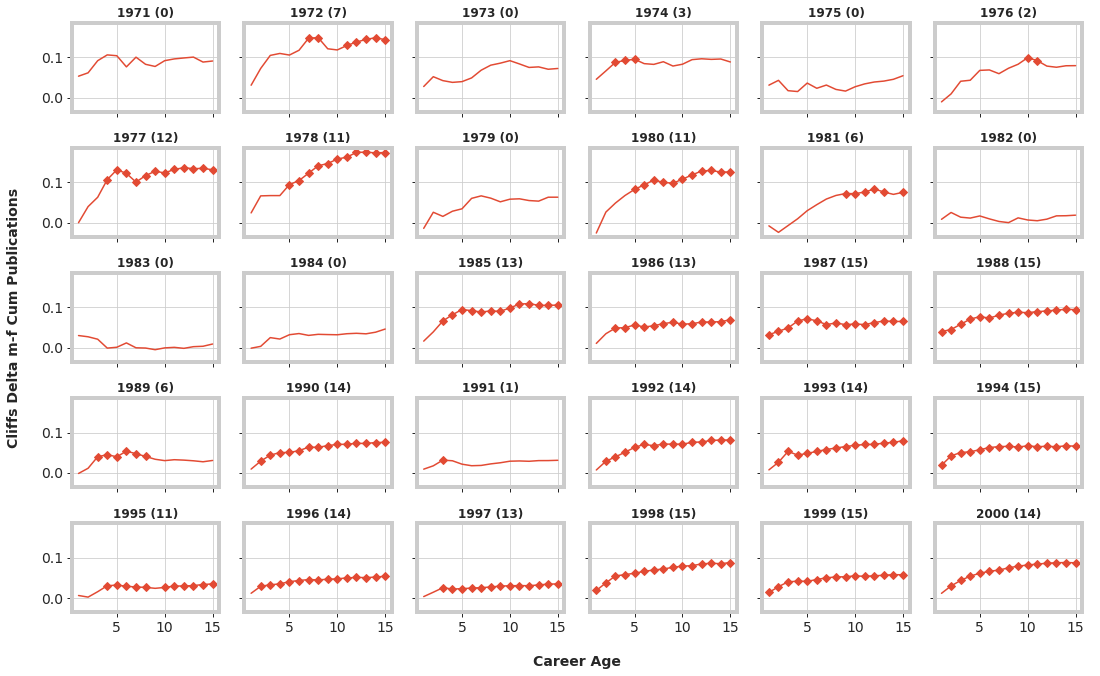

plot_cohort_diffs_over_ages_condensed


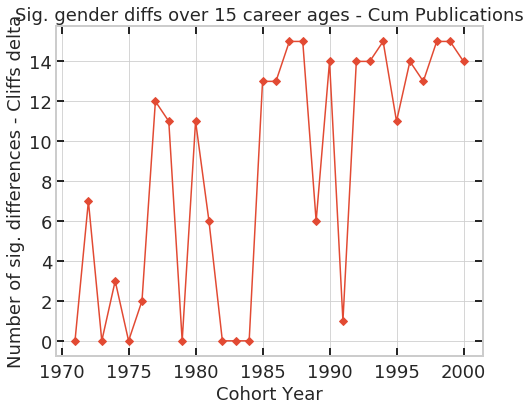

plot_gini_cliff


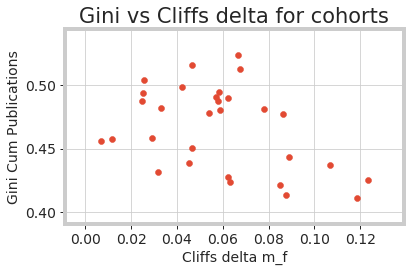

In [21]:
plot.run_cohort_analysis(groupByYearData, cohort_start_years, MAX_CAREER_LENGTH_COHORT, "cum_num_pub", "Cum Publications", authorStartEndCareerData, num_years_in_cohort)  